# BBNaija
 
**Basically, this is me obviously having some fun.**

I decided to predict the housemate to be evicted from the Big Brother Nigeria TV Show based on viewers tweets using the vader sentiment analysis from nltk, So enjoy.

In this repo you will find:
- The codes I used for scraping data from twitter 
- The codes used for the analysis and making the plot as one function

In [1]:
# Run this code if you just installed nltk

import nltk

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\francis.atoyebi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\francis.atoyebi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<ipython-input-2-2babc897fadb>:100: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(labels = x,radius = 1,  x = y)


TypeError: object of type 'numpy.float32' has no len()

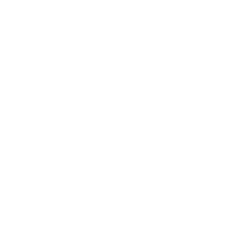

In [2]:
valid = {} #

filename = {}

data = {}

plt_data = {}

path = 'Scraped_tweets/'

#path = 'C:/Users/Francitoye/Documents/Github/BBNaija/Scraped_tweets/'


def bbnaija(path):
    '''A function that performs sentiment analysis comparison for a group of scraped tweets as long as the scraped data are in seperate csv file.
    
    This function takes in only the path to the tweet to be analysed.
    
    '''
    
    # Importing necessary library
    import seaborn as sns
    import nltk
    import matplotlib.pyplot as plt
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    analyser = SentimentIntensityAnalyzer()
    import numpy as np
    import pandas as pd
    import os
    
    tweet = os.listdir(path = path)


    def cleaner(data, column):
        '''A function to strip columns off some unnecessary text characters.'''
        data[column] = data[column].apply(lambda text: text.strip('[]'))
        data[column] = data[column].apply(lambda text: text.split('/'))
        data[column] = data[column].apply(lambda text: '' if len(text)<2 else text[2])
        print('data cleaned')
        
    def remove_ads(i):
        '''This function removes ads post from our scraped data.'''
        if len(i)>2:
            if i != 'twitter.com':
                return np.NaN
            else:
                return i
        return i
    
    
    for index,value in enumerate(tweet):
        #This loops over the files in our path and select those of csv file type
        val = value.split('.')
        if len(val) > 1:
            if val[1] == 'csv':
                valid[index] = val[1]
                filename[index] = val[0]
        else:
            pass
    
    for i,j in filename.items():
        # This loops over the valid names in the filename dictionary and performs feature selection and sentiment analysis
        name = tweet[i]
        df = pd.read_csv(path+name)
        df = df[['date', 'tweet', 'urls']] #Selecting relevnt columns from the scraped data
        
        print('relevant columns selected')
    
        colu = df.columns.to_list() #getting
        cleaner(df, 'urls')

        df['urls'] = df['urls'].apply(remove_ads)
        df['scores'] = df['tweet'].apply(lambda review: analyser.polarity_scores(review))

        df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

        df.dropna(inplace = True)

        row, column = df.shape

        rating = df['compound'].sum() / row
        count = df['compound'].sum() * row
        
        plt_data[j] = rating
        
        print(f'for {j}, \nrating: {rating} \ncount: {count} \n================================')
    total = list(plt_data.values())
    total = sum(total)
    
    for i,j in plt_data.items():
        data[i] = j/total * 100
        
    x = list(data.keys())
    y = list(data.values())
    
    df =  pd.DataFrame(data = (x,y), index=['housemate', 'rating'])

    df = df.T
    
    plt.pie(labels = x,radius = 1,  x = y)
    plt.pie(x = 1, radius=0.6, colors='w')
    plt.title('Viewers tweet rating for this week', size = 15)
    plt.savefig(fname = path+'bbnaija_pie.png', dpi = 500)
    plt.show()
    
    sns.barplot(x, y)
    plt.ylabel('Percentage Rating')
    plt.xlabel('Housemates')
    plt.title('Viewers tweet rating for this week', size = 15)
    plt.savefig(fname = path+'bbnaija_bar.png', dpi = 500)
    plt.show()
    
    return df

bbnaija(path = path)

----------------------------------------
--------------------------------------
# Yeah! It was short!

That is it and this is the output!

<img src="Scraped_tweets/bbnaija_pie.png" alt="barchart showing housemate rating" width="70%" height="70%">